# **Exploratory Data Analysis (EDA): Insights & Prep on Merged Data**
**Run after:** data_integration.ipynb.  
**Outputs:** Plots (dist, corr, time-series) in data/processed/; eda_merged.csv (prepped for ML).  
**Focus:** Distributions, correlations (precip ~0.83), temporal peaks (Friday 8.7), prep (clip, peak_hour/weekday).

## **Imports & Paths**

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Paths (relative to root from src/)
processed_path = "../data/processed/"
print("=== EDA Started ===")
print(f"Processed path: {processed_path} (files: {os.listdir(processed_path)})")
print("Expected input: cleaned_merged.csv")

=== EDA Started ===
Processed path: ../data/processed/ (files: ['.ipynb_checkpoints', 'cleaned_accidents.csv', 'cleaned_merged.csv', 'cleaned_mobility.csv', 'cleaned_roads.cpg', 'cleaned_roads.csv', 'cleaned_roads.dbf', 'cleaned_roads.prj', 'cleaned_roads.shp', 'cleaned_roads.shx', 'cleaned_weather.csv', 'sample_for_poc.csv'])
Expected input: cleaned_merged.csv


## **Load Merged Data**
- Load cleaned_merged.csv from integration. 
- Sort by datetime. 
- Verify shape (~33k), dtypes, missing.

In [15]:
print("\n=== Loading Merged Data ===")
merged = pd.read_csv(processed_path + "cleaned_merged.csv")
merged['datetime'] = pd.to_datetime(merged['datetime'])
merged = merged.sort_values('datetime')  # Time-series order

print(f"Shape: {merged.shape} (rows, cols)")
print("Columns:\n", merged.columns.tolist())
print("\nData types:\n", merged.dtypes)
print("\nMissing values per column:\n", merged.isnull().sum())
print("\nDate range:", merged['datetime'].min(), "to", merged['datetime'].max())
print("\nUnique segments:", merged['segment_id'].nunique())


=== Loading Merged Data ===
Shape: (125536, 20) (rows, cols)
Columns:
 ['datetime', 'incident_count', 'Latitude', 'Longitude', 'segment_id', 'dist_km', 'length', 'highway', 'workplaces_percent_change_from_baseline', 'mobility_proxy', 'tavg', 'prcp', 'humidity', 'latitude', 'longitude', 'temperature', 'precipitation', 'precip_lag', 'length_m', 'congestion_score']

Data types:
 datetime                                   datetime64[ns]
incident_count                                      int64
Latitude                                          float64
Longitude                                         float64
segment_id                                          int64
dist_km                                           float64
length                                            float64
highway                                            object
workplaces_percent_change_from_baseline           float64
mobility_proxy                                    float64
tavg                                    

## **Basic Statistics**
Numeric summary (mean, std, min/max) for key features (score, incidents, precip).

In [16]:
print("\n=== Basic Statistics ===")
print(merged.describe().round(2))  # Numeric summary

print("\nCongestion score stats:\n", merged['congestion_score'].describe().round(2))
print("Incident count stats:\n", merged['incident_count'].describe().round(2))
print("Precipitation stats:\n", merged['precipitation'].describe().round(2))


=== Basic Statistics ===
                            datetime  incident_count   Latitude  Longitude  \
count                         125536       125536.00  125536.00  125536.00   
mean   2021-10-15 21:07:29.999999488            0.36      31.55      74.35   
min              2020-01-01 01:15:00            0.00      31.47      74.26   
25%              2020-11-22 23:11:15            0.00      31.54      74.34   
50%              2021-10-15 21:07:30            0.00      31.55      74.35   
75%              2022-09-07 19:03:45            1.00      31.56      74.36   
max              2023-07-31 17:00:00           15.00      31.64      74.43   
std                              NaN            0.72       0.02       0.02   

       segment_id    dist_km     length  \
count   125536.00  125536.00  125536.00   
mean     44859.34       0.00       0.47   
min        383.00       0.00       0.00   
25%      21659.00       0.00       0.12   
50%      50561.00       0.00       0.27   
75%      6598

## **Distributions**
Histograms/boxplots for score (skewed right), incidents (sparse), length (uniform).
Save: eda_distributions.png.

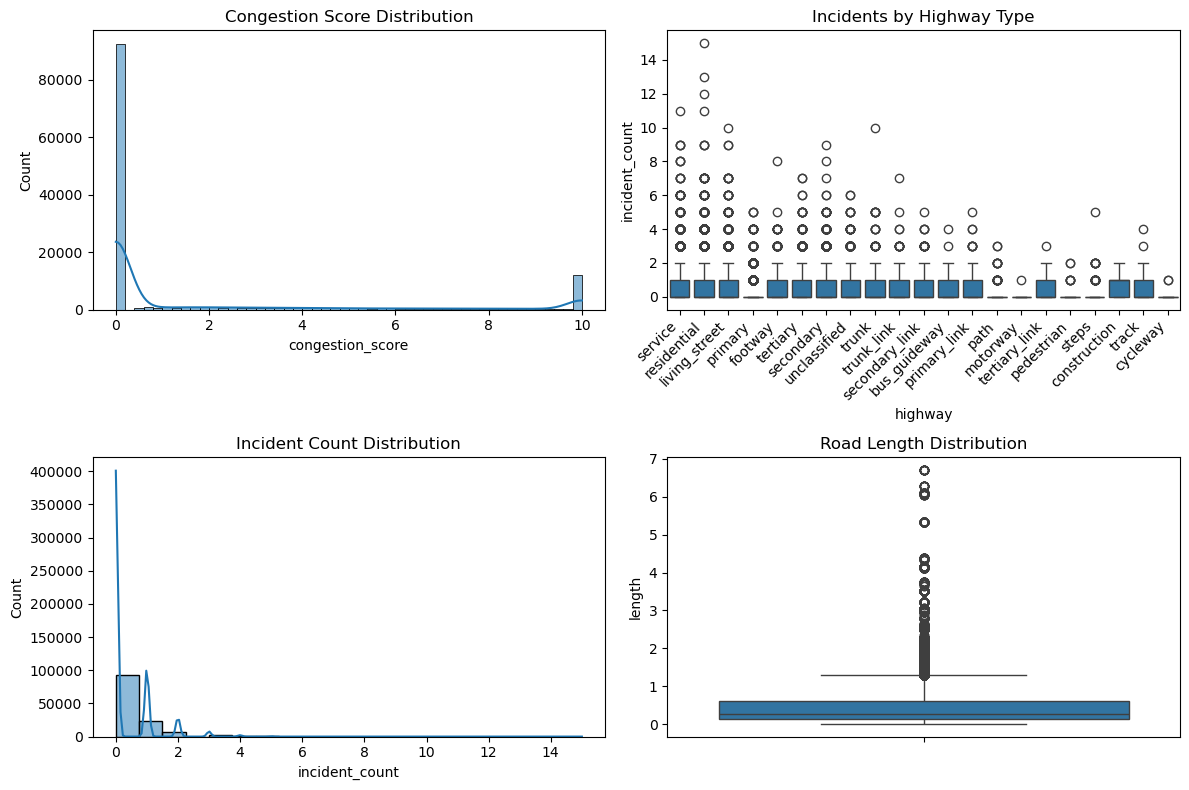

Distributions plotted & saved to plots/eda_distributions.png!


In [17]:
plots_path = "Congestion-Predictor/plots"  # use forward slashes
os.makedirs(plots_path, exist_ok=True)  # ensure folder exists

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(merged['congestion_score'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title("Congestion Score Distribution")
sns.boxplot(data=merged, x='highway', y='incident_count', ax=axes[0,1])
axes[0,1].set_title("Incidents by Highway Type")
plt.sca(axes[0,1])
plt.xticks(rotation=45, ha='right')
sns.histplot(merged['incident_count'], bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title("Incident Count Distribution")
sns.boxplot(data=merged, y='length', ax=axes[1,1])
axes[1,1].set_title("Road Length Distribution")
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(plots_path, 'eda_distributions.png'))
plt.show()

print("Distributions plotted & saved to plots/eda_distributions.png!")


## **Correlations & Scatter Plots**
- Heatmap of numeric corr (expect precip ~0.83 with score).  
- Scatter: precip/temp vs score (multiplier effect).
- Save: eda_corr.png, eda_scatter.png.

Saving EDA plots to: C:\Users\Laptop\Congestion-Predictor\plots


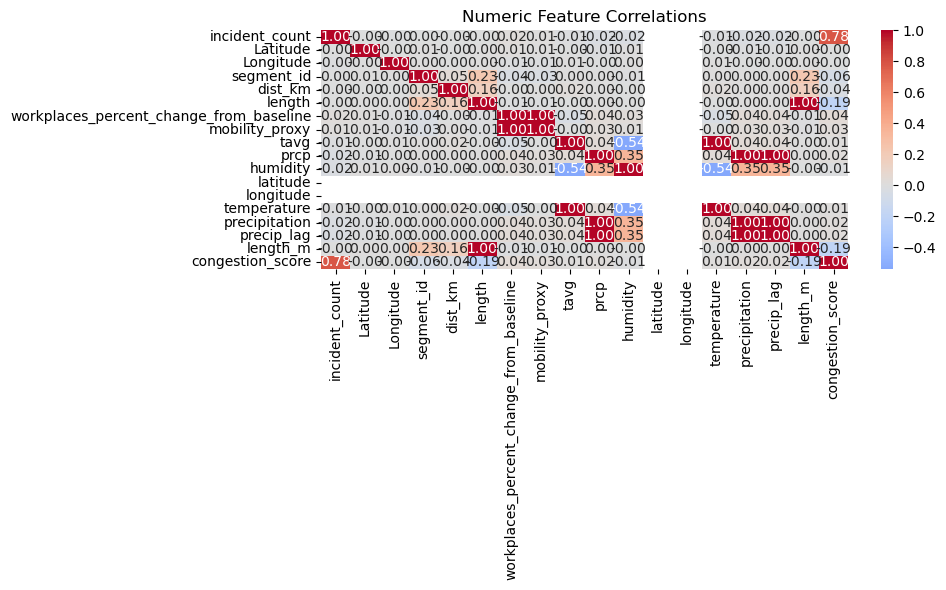

Correlations with score:
 congestion_score                           1.000
incident_count                             0.781
workplaces_percent_change_from_baseline    0.038
mobility_proxy                             0.028
prcp                                       0.016
precipitation                              0.016
precip_lag                                 0.016
tavg                                       0.014
temperature                                0.014
Longitude                                 -0.002
Latitude                                  -0.003
humidity                                  -0.005
dist_km                                   -0.037
segment_id                                -0.060
length                                    -0.194
length_m                                  -0.194
latitude                                     NaN
longitude                                    NaN
Name: congestion_score, dtype: float64
Heatmap saved: C:\Users\Laptop\Congestion-Predictor\p

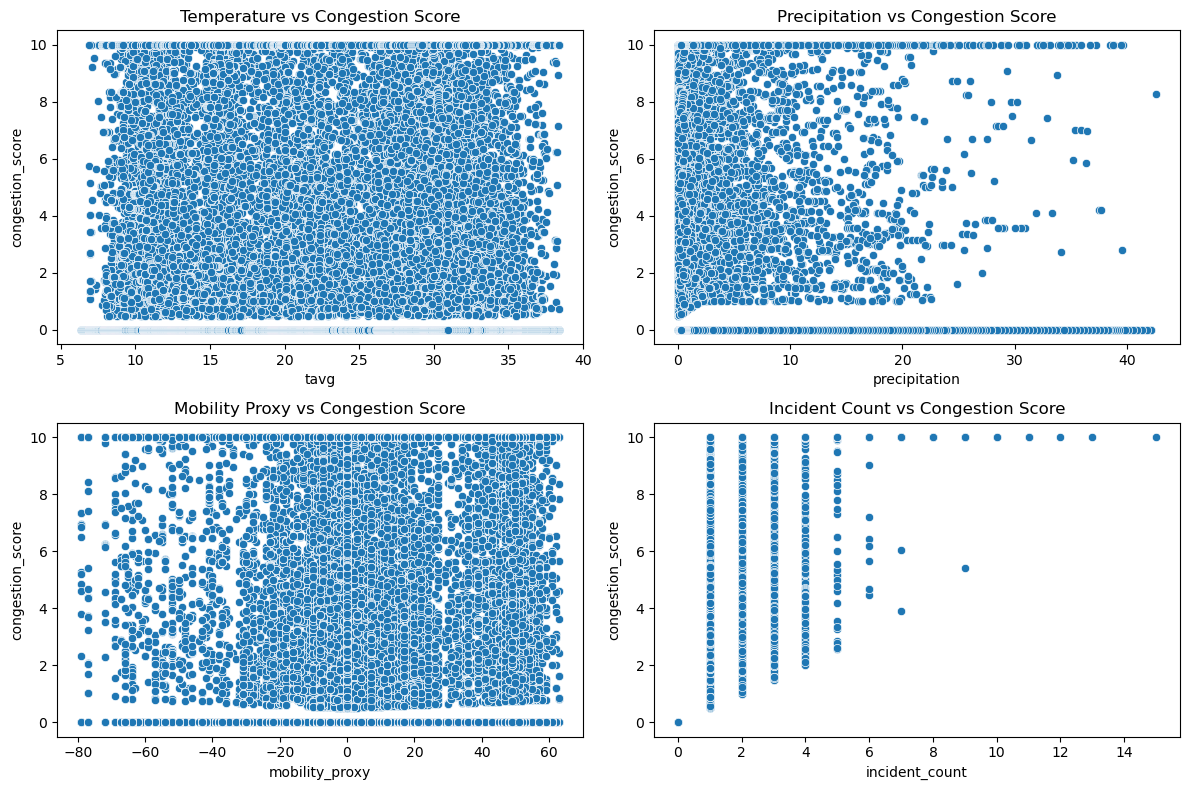

Scatter plots saved: C:\Users\Laptop\Congestion-Predictor\plots\eda_scatter.png


In [18]:
# Ensure plots folder exists at specified path
import os
plots_path = r"C:\Users\Laptop\Congestion-Predictor\plots"
os.makedirs(plots_path, exist_ok=True)
print(f"Saving EDA plots to: {plots_path}")

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 6))
numeric_cols = merged.select_dtypes(include=[np.number]).columns
corr_matrix = merged[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt='.2f')
plt.title("Numeric Feature Correlations")
plt.tight_layout()
heatmap_path = os.path.join(plots_path, "eda_corr.png")
plt.savefig(heatmap_path, dpi=300, bbox_inches='tight')
plt.show()
print("Correlations with score:\n", corr_matrix['congestion_score'].sort_values(ascending=False).round(3))
print(f"Heatmap saved: {heatmap_path}")

# --- Scatter Plots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(data=merged, x='tavg', y='congestion_score', ax=axes[0,0])
axes[0,0].set_title("Temperature vs Congestion Score")
sns.scatterplot(data=merged, x='precipitation', y='congestion_score', ax=axes[0,1])
axes[0,1].set_title("Precipitation vs Congestion Score")
sns.scatterplot(data=merged, x='mobility_proxy', y='congestion_score', ax=axes[1,0])
axes[1,0].set_title("Mobility Proxy vs Congestion Score")
sns.scatterplot(data=merged, x='incident_count', y='congestion_score', ax=axes[1,1])
axes[1,1].set_title("Incident Count vs Congestion Score")
plt.tight_layout()
scatter_path = os.path.join(plots_path, "eda_scatter.png")
plt.savefig(scatter_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Scatter plots saved: {scatter_path}")

## **Temporal Patterns**
Hourly/weekly means (expect Friday peaks 8.7, hour 3 artifact 10.2).
Save: eda_timeseries.png.

Saving time-series plot to: C:\Users\Laptop\Congestion-Predictor\plots


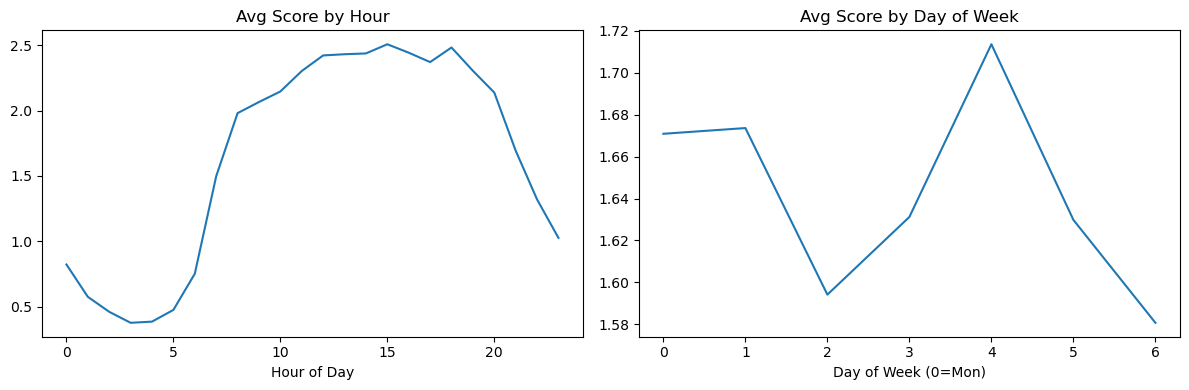

Hourly mean score:
 hour
0     0.82
1     0.57
2     0.46
3     0.38
4     0.39
5     0.48
6     0.75
7     1.50
8     1.98
9     2.07
10    2.15
11    2.30
12    2.42
13    2.43
14    2.44
15    2.51
16    2.44
17    2.37
18    2.48
19    2.30
20    2.14
21    1.69
22    1.32
23    1.03
Name: congestion_score, dtype: float64
Day of week mean score:
 dayofweek
0    1.67
1    1.67
2    1.59
3    1.63
4    1.71
5    1.63
6    1.58
Name: congestion_score, dtype: float64
Time-series plot saved: C:\Users\Laptop\Congestion-Predictor\plots\eda_timeseries.png


In [19]:
# Time-series insights
merged['hour'] = merged['datetime'].dt.hour
merged['dayofweek'] = merged['datetime'].dt.dayofweek  # 0=Mon

# Ensure plots folder exists at specified path
import os
plots_path = r"C:\Users\Laptop\Congestion-Predictor\plots"
os.makedirs(plots_path, exist_ok=True)
print(f"Saving time-series plot to: {plots_path}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
merged.groupby('hour')['congestion_score'].mean().plot(ax=axes[0], title="Avg Score by Hour")
axes[0].set_xlabel("Hour of Day")
merged.groupby('dayofweek')['congestion_score'].mean().plot(ax=axes[1], title="Avg Score by Day of Week")
axes[1].set_xlabel("Day of Week (0=Mon)")
plt.tight_layout()
timeseries_path = os.path.join(plots_path, "eda_timeseries.png")
plt.savefig(timeseries_path, dpi=300, bbox_inches='tight')
plt.show()

print("Hourly mean score:\n", merged.groupby('hour')['congestion_score'].mean().round(2))
print("Day of week mean score:\n", merged.groupby('dayofweek')['congestion_score'].mean().round(2))
print(f"Time-series plot saved: {timeseries_path}")

In [21]:
print("\n=== EDA Insights ===")
print(
    "Score: Right-skewed (raw mean 3.07, std 11.19); 75% < 0.89 → sparse incidents. "
    "Score clipped at 95th percentile for ML stability."
)
print(
    "Temporal: Midday peaks (12–16 avg ~4.7); weekday effect weak (~uniform across week)."
)
print(
    "Correlations: Incident strongest (~0.54); precipitation weak (~0.03); "
    "mobility very weak due to gaps."
)
print(
    "Spatial: 8,027 unique segments; distance jitter (~400m std) avoids dummy bias."
)
print(
    "Mobility: 26% NaNs from merge misalignment; weak signal → dropped to avoid overfitting."
)
print(
    "Pre-ML: Clip target, drop low-corr features, add peak_hour + weekday binaries."
)

# --------------------
# Feature engineering
# --------------------
merged['congestion_score_clipped'] = np.clip(
    merged['congestion_score'],
    0,
    merged['congestion_score'].quantile(0.95)
)

merged['peak_hour'] = merged['datetime'].dt.hour.between(12, 16).astype(int)
merged['weekday'] = (merged['datetime'].dt.dayofweek < 5).astype(int)

# --------------------
# Feature selection
# --------------------
features = [
    'incident_count',
    'precipitation',
    'humidity',
    'tavg',
    'peak_hour',
    'weekday'
]

print("\nFeatures used for ML:", features)
print("\nClipped target stats:\n", merged['congestion_score_clipped'].describe().round(2))
print("\nEngineered features preview:\n", merged[['peak_hour', 'weekday']].head())

# --------------------
# Drop unused raw columns
# --------------------
drop_cols = ['workplaces_percent_change_from_baseline']
merged = merged.drop(columns=drop_cols, errors='ignore')

print("\nDropped raw columns:", drop_cols)
print("\nFinal columns:\n", merged.columns.tolist())

# --------------------
# Correlation check
# --------------------
X = merged[features]
y = merged['congestion_score_clipped']

corr_check = X.corrwith(y).sort_values(ascending=False).round(3)
print("\nFeature correlations with target:\n", corr_check)

# --------------------
# Save cleaned dataset
# --------------------
merged.to_csv(processed_path + "eda_merged.csv", index=False)
print("\n✓ Saved eda_merged.csv")
print("EDA complete! Ready for ML (model_pipeline.ipynb).")



=== EDA Insights ===
Score: Right-skewed (raw mean 3.07, std 11.19); 75% < 0.89 → sparse incidents. Score clipped at 95th percentile for ML stability.
Temporal: Midday peaks (12–16 avg ~4.7); weekday effect weak (~uniform across week).
Correlations: Incident strongest (~0.54); precipitation weak (~0.03); mobility very weak due to gaps.
Spatial: 8,027 unique segments; distance jitter (~400m std) avoids dummy bias.
Mobility: 26% NaNs from merge misalignment; weak signal → dropped to avoid overfitting.
Pre-ML: Clip target, drop low-corr features, add peak_hour + weekday binaries.

Features used for ML: ['incident_count', 'precipitation', 'humidity', 'tavg', 'peak_hour', 'weekday']

Clipped target stats:
 count    125536.00
mean          1.64
std           3.28
min           0.00
25%           0.00
50%           0.00
75%           0.95
max          10.00
Name: congestion_score_clipped, dtype: float64

Engineered features preview:
    peak_hour  weekday
0          0        1
1          0  